In [42]:
# Importing necessary libraries 
import pandas as pd
import numpy as np
import seaborn as sns 
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Creating connection to Spotify's API client with user credentials
client_credentials_manager = SpotifyClientCredentials(client_id='ce96fd47ccbd46bea620fd2f0ca51492', client_secret='a17719bdab6d44068eb7fc4d9aae60db') 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) 

In [3]:
# Obtaining tracks from a Spotify playlist 
def get_playlist_tracks(username,playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

# Retrieve track information/metadata and compile into a dataframe
def call_playlist(creator, playlist_id):
    
    # Step 1: Creating a list of feature names
    
    playlist_features_list = ["artist","album","track_name", "track_id","danceability","energy","key","loudness","mode", "speechiness", "acousticness","instrumentalness","liveness","valence","tempo", "duration_ms","time_signature"]
    playlist_df = pd.DataFrame(columns = playlist_features_list)
    
    # Step 2: Creating a list of all the tracks
    
    playlist = get_playlist_tracks(creator, playlist_id) # List of tracks 
    for track in playlist:
        # Create empty dict
        playlist_features = {}
        # Get metadata
        playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
        playlist_features["album"] = track["track"]["album"]["name"]
        playlist_features["track_name"] = track["track"]["name"]
        playlist_features["track_id"] = track["track"]["id"]
        # Get audio features
        audio_features = sp.audio_features(playlist_features["track_id"])[0]
        for feature in playlist_features_list[4:]:
            try: 
                playlist_features[feature] = audio_features[feature]
            except:
                continue
        # Concat the dataframes
        track_df = pd.DataFrame(playlist_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)

    # Step 3 
    
    return playlist_df

In [23]:
playlist_dict = {
    "good_songs" : ("corneliuspau", "https://open.spotify.com/playlist/6NuLLsgMGulGVz2L3gAgDC?si=ec8905f58b164dc2"), 
    "bad_songs" : ("corneliuspau", "https://open.spotify.com/playlist/0c2EBPpAI4aWKYkCCxJJTb?si=c8f94b4034a74a0a"),
}

In [24]:
# Analyzing multiple playlists at once  
def analyze_playlist_dict(playlist_dict):
    
    # Loop through every playlist in the dict and analyze it
    for i, (key, val) in enumerate(playlist_dict.items()):
        playlist_df = call_playlist(*val)
        # Add a playlist column so that we can see which playlist a track belongs too
        playlist_df["playlist"] = key
        # Create or concat df
        if i == 0:
            playlist_dict_df = playlist_df
        else:
            playlist_dict_df = pd.concat([playlist_dict_df, playlist_df], ignore_index = True)
            
    return playlist_dict_df

multiple_playlist_df = analyze_playlist_dict(playlist_dict)

In [25]:
multiple_playlist_df

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,playlist
0,Lil Uzi Vert,Luv Is Rage 2 (Deluxe),20 Min,0uxSUdBrJy9Un0EYoBowng,0.773,0.750,8,-4.009,0,0.1170,0.1090,0,0.1740,0.7830,123.426,220587,4,good_songs
1,Travis Scott,HIGHEST IN THE ROOM,HIGHEST IN THE ROOM,3eekarcy7kvN4yt5ZFzltW,0.598,0.427,7,-8.764,0,0.0317,0.0546,0.000006,0.2100,0.0605,76.469,175721,4,good_songs
2,Drake,The Best In The World Pack,Money In The Grave (Drake ft. Rick Ross),5ry2OE6R2zPQFDO85XkgRb,0.831,0.502,10,-4.045,0,0.0460,0.1010,0,0.1220,0.1010,100.541,205427,4,good_songs
3,A$AP Ferg,Floor Seats II,In It (feat. Latto),2GDFfYpuDzUjB7gYtNbR8n,0.833,0.571,10,-6.156,0,0.3800,0.1080,0.000019,0.1800,0.9060,75.043,118440,4,good_songs
4,Rae Sremmurd,SremmLife,This Could Be Us,4jTiyLlOJVJj3mCr7yfPQD,0.732,0.690,0,-4.992,0,0.1340,0.2910,0,0.1160,0.7580,143.072,206307,4,good_songs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,Joshua Bell,French Impressions,"Violin Sonata in A major, FWV 8: IV. Allegrett...",0xX7kREWmOGBWzYNcpZwRN,0.250,0.135,9,-18.615,1,0.0488,0.9580,0.0349,0.0477,0.1790,94.404,364093,4,bad_songs
1003,Karl Jenkins,Adiemus - Songs Of Sanctuary,Adiemus,54CAG8n70kKVbFV6l1zF4G,0.295,0.408,4,-16.632,0,0.0693,0.8040,0.148,0.1650,0.1640,150.454,237413,3,bad_songs
1004,Aram Khachaturian,Khachaturian: Spartacus and Gayaneh highlights...,Khachaturian: Spartacus Suite No. 2: I. Adagio...,2nVt0n0aSj3AwZjakMvDHX,0.165,0.106,8,-21.742,1,0.0390,0.8070,0.782,0.1050,0.0336,105.651,592040,3,bad_songs
1005,Arvo Pärt,Arvo Pärt: Alina,Spiegel im Spiegel - Version for Violin and Piano,4wudbbceOZKjRlhTtbHvAs,0.176,0.006,5,-42.238,1,0.0384,0.8990,0.000032,0.1050,0.0383,71.477,636000,3,bad_songs


In [26]:
# Creating a "Good" column to indicate which songs are from the good or bad paylist
multiple_playlist_df["Good"] = np.where((multiple_playlist_df["playlist"] == "good_songs"),1,0)
multiple_playlist_df.drop(columns=['playlist'])

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Good
0,Lil Uzi Vert,Luv Is Rage 2 (Deluxe),20 Min,0uxSUdBrJy9Un0EYoBowng,0.773,0.750,8,-4.009,0,0.1170,0.1090,0,0.1740,0.7830,123.426,220587,4,1
1,Travis Scott,HIGHEST IN THE ROOM,HIGHEST IN THE ROOM,3eekarcy7kvN4yt5ZFzltW,0.598,0.427,7,-8.764,0,0.0317,0.0546,0.000006,0.2100,0.0605,76.469,175721,4,1
2,Drake,The Best In The World Pack,Money In The Grave (Drake ft. Rick Ross),5ry2OE6R2zPQFDO85XkgRb,0.831,0.502,10,-4.045,0,0.0460,0.1010,0,0.1220,0.1010,100.541,205427,4,1
3,A$AP Ferg,Floor Seats II,In It (feat. Latto),2GDFfYpuDzUjB7gYtNbR8n,0.833,0.571,10,-6.156,0,0.3800,0.1080,0.000019,0.1800,0.9060,75.043,118440,4,1
4,Rae Sremmurd,SremmLife,This Could Be Us,4jTiyLlOJVJj3mCr7yfPQD,0.732,0.690,0,-4.992,0,0.1340,0.2910,0,0.1160,0.7580,143.072,206307,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,Joshua Bell,French Impressions,"Violin Sonata in A major, FWV 8: IV. Allegrett...",0xX7kREWmOGBWzYNcpZwRN,0.250,0.135,9,-18.615,1,0.0488,0.9580,0.0349,0.0477,0.1790,94.404,364093,4,0
1003,Karl Jenkins,Adiemus - Songs Of Sanctuary,Adiemus,54CAG8n70kKVbFV6l1zF4G,0.295,0.408,4,-16.632,0,0.0693,0.8040,0.148,0.1650,0.1640,150.454,237413,3,0
1004,Aram Khachaturian,Khachaturian: Spartacus and Gayaneh highlights...,Khachaturian: Spartacus Suite No. 2: I. Adagio...,2nVt0n0aSj3AwZjakMvDHX,0.165,0.106,8,-21.742,1,0.0390,0.8070,0.782,0.1050,0.0336,105.651,592040,3,0
1005,Arvo Pärt,Arvo Pärt: Alina,Spiegel im Spiegel - Version for Violin and Piano,4wudbbceOZKjRlhTtbHvAs,0.176,0.006,5,-42.238,1,0.0384,0.8990,0.000032,0.1050,0.0383,71.477,636000,3,0


In [27]:
# Checking for null values
multiple_playlist_df.isnull().sum()

artist              0
album               0
track_name          0
track_id            0
danceability        1
energy              1
key                 1
loudness            1
mode                1
speechiness         1
acousticness        1
instrumentalness    1
liveness            1
valence             1
tempo               1
duration_ms         1
time_signature      1
playlist            0
Good                0
dtype: int64

In [28]:
# Removing null values 
multiple_playlist_df.dropna(subset = ['key'], inplace=True)

In [59]:
# Oversampling minority class using SMOTE
X = multiple_playlist_df.drop(columns=['track_name','album','artist','key','mode','time_signature', 'track_id', 'playlist'])
y = multiple_playlist_df.Good
oversample = SMOTE()
X, y = oversample.fit_resample(X,y)
X['Good'] = y
X.head(5)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,Good
0,0.773,0.750,-4.009,0.1170,0.1090,0.0,0.174,0.7830,123.426,220587.0,1
1,0.598,0.427,-8.764,0.0317,0.0546,0.000006,0.210,0.0605,76.469,175721.0,1
2,0.831,0.502,-4.045,0.0460,0.1010,0.0,0.122,0.1010,100.541,205427.0,1
3,0.833,0.571,-6.156,0.3800,0.1080,0.000019,0.180,0.9060,75.043,118440.0,1
4,0.732,0.690,-4.992,0.1340,0.2910,0.0,0.116,0.7580,143.072,206307.0,1


In [65]:
## Features like tempo and duration_ms are a lot bigger than the other features, so we will perform standardization so that all the features are on the same scale

In [57]:
scale = StandardScaler()
scaled_data = scale.fit_transform(X.drop(columns=['Good']))
df_standard = pd.DataFrame(scaled_data, columns=X.columns[:10])
df_standard['Good'] = X.Good
df_standard

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,Good
0,0.842391,0.475810,0.741339,0.047619,-0.395209,-0.361323,-0.146327,1.382527,0.062018,-0.035021,1
1,-0.141262,-1.012044,-0.354055,-0.778065,-0.582099,-0.361297,0.105023,-1.891533,-1.638612,-0.568884,1
2,1.168402,-0.666567,0.733046,-0.639644,-0.422693,-0.361323,-0.509387,-1.708004,-0.766803,-0.215411,1
3,1.179643,-0.348728,0.246742,2.593398,-0.398644,-0.361242,-0.104435,1.939910,-1.690257,-1.250475,1
4,0.611935,0.199429,0.514888,0.212175,0.230048,-0.361323,-0.551279,1.269238,0.773532,-0.204939,1
...,...,...,...,...,...,...,...,...,...,...,...
1479,1.530932,0.004955,0.088345,1.647585,-0.415894,-0.361323,2.001147,-0.200184,-0.448432,-0.926208,1
1480,0.247305,0.723481,0.732950,-0.610572,0.596291,-0.361323,0.651676,0.472966,-0.200941,-0.131192,1
1481,1.066201,-0.377068,0.385686,-0.273334,-0.658869,-0.361323,0.407331,-0.828553,-0.549702,0.136932,1
1482,-0.742977,0.744964,0.949260,1.288791,-0.172568,-0.361322,-0.596033,1.778735,0.445957,-0.154810,1


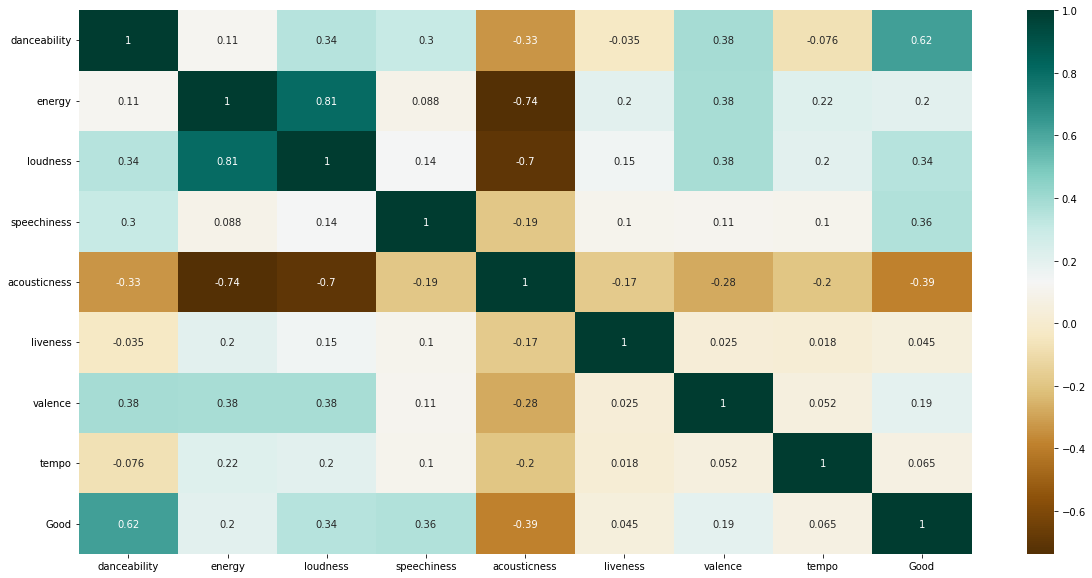

In [60]:
# Creating a correlation matrix
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,10))
c = X.corr()
corr = sns.heatmap(c,cmap="BrBG",annot=True)

In [61]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X, 0.6) 
print(corr_features)

{'danceability', 'loudness', 'energy'}


In [54]:
# Importing required libraries for Machine Learning 
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier

In [73]:
# Train / Split Data
X_train, X_test, y_train, y_test = train_test_split(df_standard.drop(columns=['Good']), df_standard.Good,test_size = .20)

In [67]:
model_params = {
    'knn': {
        'model': KNeighborsClassifier(),
        'params' : {
            'n_neighbors': [5,10,15,20],
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [5,10,15,20],
            'max_depth' : [5,10,15]
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params' : {
            'max_depth': [2,4,5],
            'criterion' : ('gini', 'entropy'), 
            'max_features' : ('auto', 'sqrt', 'log2'),
            'min_samples_split' : (2,4,6)
        }
    },
    'logistic_regression' : {
       'model': LogisticRegression(solver='liblinear',multi_class='auto'),
       'params': {
          'C': [1,5,10]
       }
    }
}


In [74]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=10,return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
best_fit_test = pd.DataFrame(scores,columns=['model','best_score','best_params'])
best_fit_test

,model,best_score,best_params
0,knn,0.880373,{'n_neighbors': 10}
1,random_forest,0.910732,"{'max_depth': 15, 'n_estimators': 20}"
2,decision_tree,0.833236,"{'criterion': 'gini', 'max_depth': 5, 'max_fea..."
3,logistic_regression,0.877026,{'C': 5}


In [80]:
# Random Forest classifier for prediction
rf_test = Pipeline([('rf', RandomForestClassifier(n_estimators = 20, max_depth = 15))])
rf_test.fit(X_train, y_train)
new_songs = call_playlist("corneliuspau", "https://open.spotify.com/playlist/0JvDPeYgbirFfqV28rFV5G?si=c1223070f318481c")

In [83]:
# Standardizing new data before predicting 
pred_scaled_data = scale.fit_transform(new_songs.drop(columns=['track_name','album','artist',
                                                               'key','mode','time_signature', 'track_id']))
pred_df_standard = pd.DataFrame(pred_scaled_data, columns=X.columns[:10])
songs_pred = rf_test.predict(pred_df_standard)

In [85]:
new_songs['prediction'] = songs_pred
new_songs = new_songs[new_songs['prediction'] == 1]
new_songs

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,prediction
5,Vedo,Yummy (V-Mix),Yummy (V-Mix),76VjyLXxHBF11Gy1FlYCr0,0.772,0.479,2,-8.553,0,0.2510,0.2820,0.000000,0.0957,0.577,146.035,151928,4,1
6,YK Osiris,The Golden Child,Make Love,0M6MQbtwPTUo2jkU9Ho3pe,0.726,0.685,11,-5.018,0,0.0516,0.3560,0.000000,0.1660,0.676,122.003,191893,4,1
18,Omarion,Can You Hear Me? (feat. T-Pain),Can You Hear Me? (feat. T-Pain),2rM4g5n1YwiMNz5QX6zFmb,0.768,0.705,0,-5.053,1,0.0801,0.0696,0.000000,0.1990,0.767,140.040,168107,4,1
19,dvsn,Between Us (feat. Snoh Aalegra),Between Us (feat. Snoh Aalegra),2ynqtdm2zE73wuNKjGItwp,0.770,0.458,1,-10.663,0,0.1050,0.0533,0.000015,0.1390,0.177,127.956,183750,4,1
28,Drake,Dark Lane Demo Tapes,Time Flies,5H4mXWKcicuLKDn4Jy0sK7,0.864,0.477,10,-5.786,1,0.2240,0.2010,0.000000,0.1820,0.500,86.460,192932,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,Playboi Carti,Die Lit,FlatBed Freestyle,5nayhWICkQGMTkisxVMbRw,0.755,0.552,9,-5.604,1,0.2880,0.0967,0.000000,0.1580,0.402,153.157,193973,4,1
984,JACKBOYS,JACKBOYS,OUT WEST (feat. Young Thug),6gi6y1xwmVszDWkUqab1qw,0.802,0.591,8,-4.895,1,0.2250,0.0104,0.000000,0.1960,0.309,139.864,157712,4,1
985,Luh Kel,Mixed Emotions,Pull Up,40k1FQUvcnSUkP0djIxpdA,0.803,0.569,1,-6.366,1,0.0705,0.0957,0.000000,0.0976,0.260,95.009,123400,4,1
987,SZA,Ctrl,Love Galore (feat. Travis Scott),0q75NwOoFiARAVp4EXU4Bs,0.795,0.594,0,-6.200,1,0.0748,0.1120,0.000000,0.1620,0.409,135.002,275080,4,1
